# Redes Neuronales Artificiales (ANNs)

* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

## Modelo de la neurona artificial

Modelo de McCulloch-Pitts:

<div>
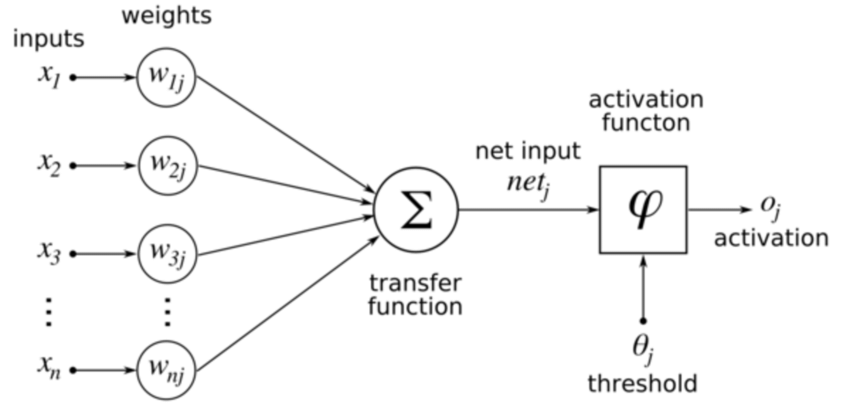
</div>

$$
y = \varphi \Bigl(\sum_{j=0}^{n}w_{j}x_j\Bigr)
$$

* La neurona recibe "estímulos" que tienen diferentes pesos _w_
* Se suman los estímulos recibidos (pesados) y se evalúa en una función de activación
* La función de activación resulta en el estímulo que emite la neurona a la siguiente capa de la red. Entre las funciones de activación utilizadas popularmente están:
    * Función lineal
    * Función paso
    * Función rampa
    * Función sigmoide

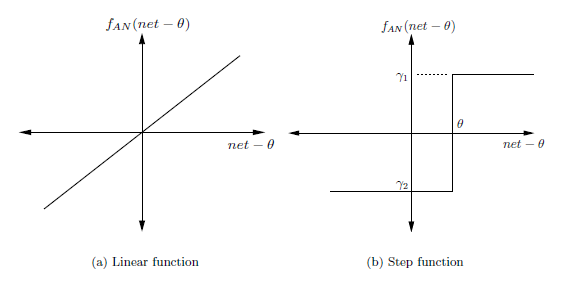

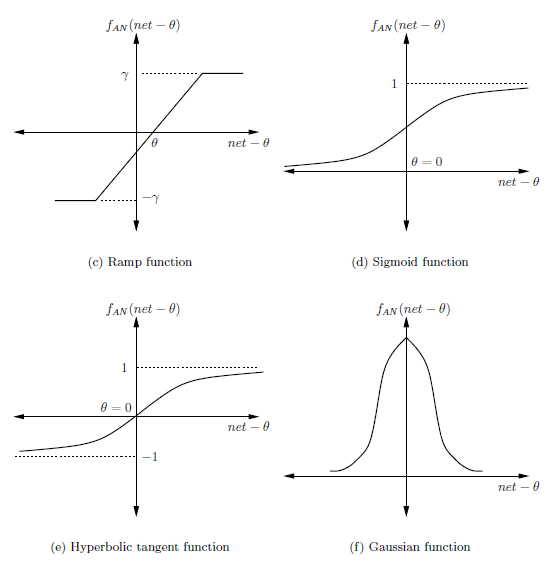

## Modelos de redes neuronales artificiales (ANN)
Modelo de un Multi-Layer Perceptron (MLP)

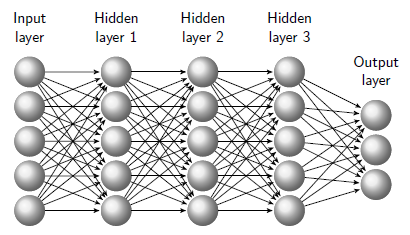

* Feedforward Neural Network (FFN)
* Redes neuronales convulucionales (CNN)
* Redes Neuronales generativas (GAN)

## Entrenamiento de un MLP

* Se define una función de pérdida o de error.
* Se optimizan los pesos del MLP hacia atrás (desde la capa de salida hasta la capa de entradas) de forma que se reduce la pérdida o el error. A este proceso se le conoce como retropropagación (_backpropagation_)

## Clasificación

`MLPClassifier` is a Multi-layer Perceptron classifier provided by scikit-learn. It is a type of neural network that is suited for classification tasks. It consists of multiple layers of nodes, each fully connected to the nodes in the previous and next layers. The activation function used by default is the ReLU (Rectified Linear Unit), and the output layer uses the softmax function for classification tasks.


* `MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)`:
    * `hidden_layer_sizes=(10,)`: Specifies one hidden layer with 10 neurons.
    * `max_iter=1000`: Sets the maximum number of iterations for training.
    * `random_state=42`: Ensures reproducibility by setting a seed for the random number generator.
    * `mlp.fit(X_train, y_train)`: Trains the model using the training data.

In [ ]:
# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

* `StandardScaler` is a preprocessing tool provided by scikit-learn to standardize features by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the model and prevents features with larger ranges from dominating the learning process.

    * `StandardScaler()`: Initializes the scaler.
    * `scaler.fit_transform(X_train)`: Fits the scaler on the training data and then transforms the training data by scaling it.
    * `scaler.transform(X_test)`: Transforms the test data using the same scaling parameters learned from the training data.

### Ejemplo 1: clasificación

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

# Load the dataset
iris = load_iris()

X, y = iris.data, iris.target

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print(f'We have {iris.data.shape[0]} data samples with {iris.data.shape[1]} features')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4 features


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f'X_train: {X_train}')

# train_test_split?

In [4]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [6]:
# Predict the test set results
y_pred = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



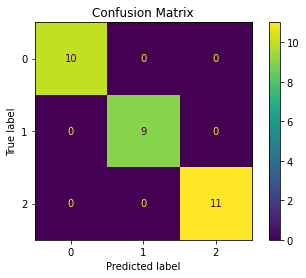

In [7]:
# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



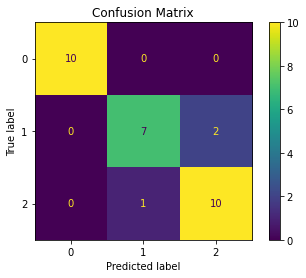

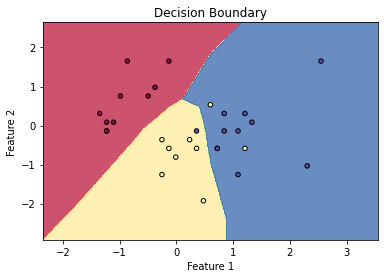

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

# Load the dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Use only the first two features for visualization

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict the test set results
y_pred = mlp.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, mlp)


### Ejemplo 2:

In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [10]:
# import the iris data
iris = datasets.load_iris()

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print(f'We have {iris.data.shape[0]} data samples with {iris.data.shape[1]} features')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4 features


In [11]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [12]:
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print(f'We have {n_class} classes in the data')

We have 3 classes in the data


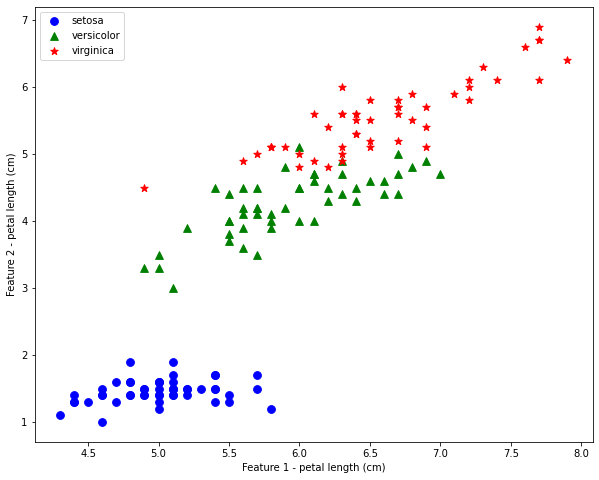

In [13]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel(f'Feature 1 - {feature_names[2]}')
plt.ylabel(f'Feature 2 - {feature_names[2]}')
plt.show()

In [14]:
# Initialize SVM classifier
#clf = svm.SVC(kernel='linear')
clf = MLPClassifier(solver="lbfgs", alpha=1, random_state=1, max_iter=2000, early_stopping=True, hidden_layer_sizes=[10, 10])

# Train the classifier with data
clf.fit(X,y)

MLPClassifier(alpha=1, early_stopping=True, hidden_layer_sizes=[10, 10],
              max_iter=2000, random_state=1, solver='lbfgs')

In [15]:
# predict on the data
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])

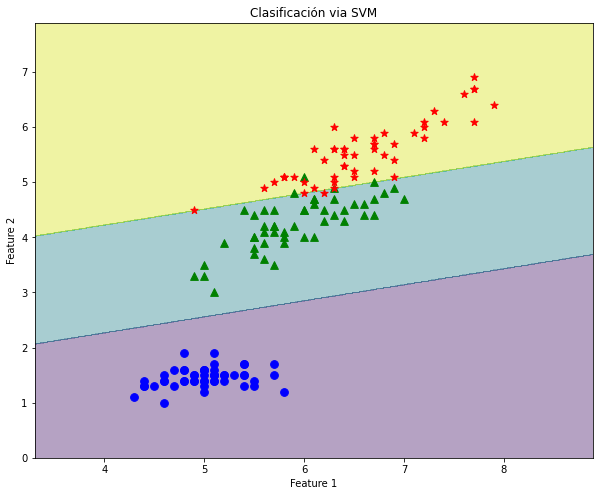

In [17]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
#        plt.scatter(X[:, 0][ix], X[:, 1][ix], color = c, marker = s, s = 60, label = target_names[i])
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])    
#    if title is not None:
#       plt.title(title)

    plt.title('Clasificación via SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
plot_desicion_boundary(X, y, clf)

## Regresión

`MLPRegressor` is a Multi-layer Perceptron regressor provided by scikit-learn. It is similar to `MLPClassifier` but is used for regression tasks. It also consists of multiple layers of nodes and uses the ReLU activation function by default.

`MLPRegressor` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. **Therefore, it uses the square error as the loss function**, and the output is a set of continuous values.

* `MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)`:
    * `hidden_layer_sizes=(10,)`: Specifies one hidden layer with 10 neurons.
    * `max_iter=1000`: Sets the maximum number of iterations for training.
    * `random_state=42`: Ensures reproducibility by setting a seed for the random number generator.
    * `mlp.fit(X_train, y_train)`: Trains the model using the training data.

### Ejemplo 1: Regresión lineal

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Create and train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict the test set results
y_pred = mlp.predict(X_test)

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.3441578388254657
R^2 Score: 0.7373660860539393


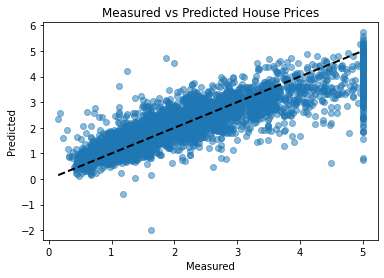

In [22]:
# Plot the results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title("Measured vs Predicted House Prices")
plt.show()

### Ejemplo 2: Regresión polinomial

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

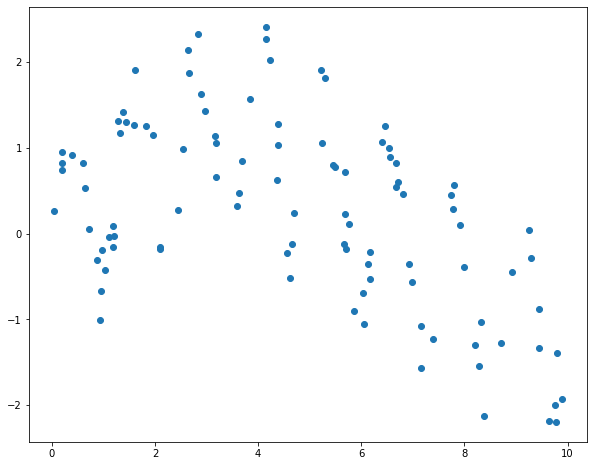

In [24]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (10,8))
y = model(x)
plt.scatter(x, y)

In [27]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), 
                   max_iter = 2000, 
                   solver='lbfgs', 
                   alpha=0.01, 
                   activation = 'tanh',
                   random_state = 8)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, 0)

yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


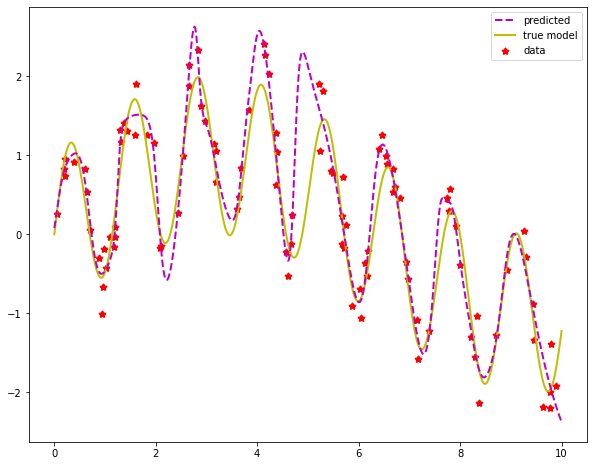

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(x, y, marker='*', color='r', lw=2, label='data', zorder = 1)
plt.plot(xfit, yfit, '--m', lw = 2, label = 'predicted', zorder = 3)
plt.plot(xfit, ytrue, '-y', lw = 2, label = 'true model', zorder = 2)
plt.legend()
plt.show()

### Explanation

1. Loading Data:
    * For classification, we use the Iris dataset.
    * For regression, we use the California housing dataset.


2. Preprocessing:
    * Data is split into training and testing sets.
    * Features are standardized using StandardScaler.


3. Model Creation:
    * MLPClassifier is used for classification with one hidden layer of 10 neurons.
    * MLPRegressor is used for regression with similar settings.


4. Training:
    * Models are trained on the training data.


5. Evaluation:
    * Classification: Use a confusion matrix and classification report.
    * Regression: Use mean squared error and R² score.


6. Plotting:
    * For classification, plot the confusion matrix.
    * For regression, plot a scatter plot comparing measured vs predicted values.

These examples provide a basic structure for using neural networks with scikit-learn for both classification and regression problems.

## Referencias
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter25.01-Concept-of-Machine-Learning.html
* https://github.com/microsoft/ML-For-Beginners
* https://github.com/microsoft/AI-For-Beginners
* https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised
* Engelbrecht, A. P. (2007). Computational intelligence: an introduction. John Wiley & Sons.